<a href="https://colab.research.google.com/github/danie-cp/Machine-Learning-Models/blob/main/Logistic_Regression_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Set working folder by using %cd [working folder] and copy the ames.csv data set to this folder. (Note: Replace the name of my working folder with the one you are using.)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/DSC326_Spring2025/PythonFolder

/content/drive/MyDrive/Colab Notebooks/DSC326_Spring2025/PythonFolder


Import packages for logistic regression

In [ ]:
import numpy as np
import pandas as pd
import math
from matplotlib.pyplot import subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
#a
default = pd.read_csv('default.csv')
default['default'] = np.where(default['default'] == "Yes", 1, 0)		# Recode Yes to 1, No to 0
default

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879
...,...,...,...,...
9995,0,No,711.555020,52992.378914
9996,0,No,757.962918,19660.721768
9997,0,No,845.411989,58636.156984
9998,0,No,1569.009053,36669.112365


Fit a logistic regression model to predict Profit given the value of LOpening.

In [ ]:
X = default[['balance']]
y = default['default']

Split the data in X and y into training and testing sets, use a test set size of 20% of the entire data set. Set the random state to some two-digit integer. Use X_train, y_train, X_test, y_test to denote the data frames for the training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

Create a bar graph for the response variable.

In [ ]:
# create a frequency table for y
freq_table = y_train.value_counts()
freq_table

,count
default,
0,7735
1,265


Create a bar graph for y

<Axes: xlabel='default'>

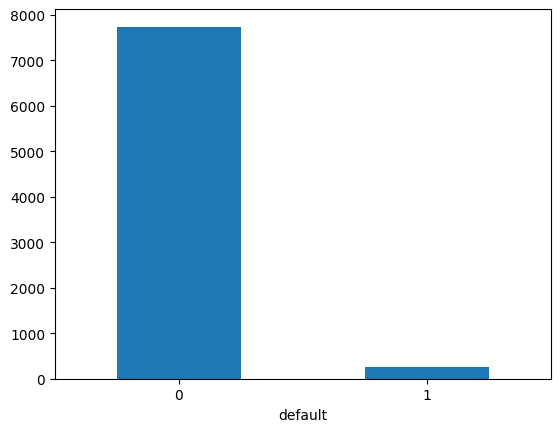

In [ ]:
freq_table.plot(kind='bar', rot=0)

array([[<Axes: title={'center': 'balance'}>]], dtype=object)

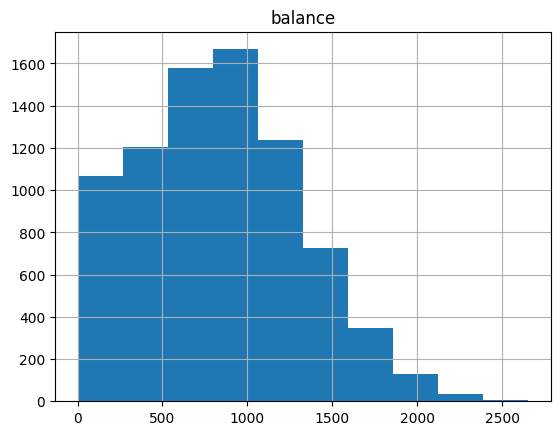

In [ ]:
X_train.hist()

Plot the distribution of the explanatory variable.

**Fit a logistic regression model to predict Default given the value of Balance using statsmodel.**

In [ ]:
defualt_train = pd.concat([X_train, y_train], axis=1)
train_df = sm.add_constant(defualt_train)  # include intercept
train_df

,const,balance,default
52,1.0,1505.782675,0
4720,1.0,723.371847,0
1448,1.0,633.769189,0
9354,1.0,1323.395658,0
8123,1.0,1587.564398,0
...,...,...,...
347,1.0,817.249811,0
6175,1.0,275.624647,0
9704,1.0,1157.116929,0
9256,1.0,1800.641733,1


In [ ]:
model = smf.glm(formula = 'default ~ balance', data=train_df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -622.90
Date:                Thu, 27 Feb 2025   Deviance:                       1245.8
Time:                        01:34:13   Pearson chi2:                 6.04e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1264
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8286      0.413    -26.200      0.0

In [ ]:
#b
print("Coefficients")
print(result.params)
print()
print("Standard errors")
print(result.bse)
print()
print("p-Values")
print(result.pvalues)

Coefficients
Intercept   -10.828607
balance       0.005618
dtype: float64

Standard errors
Intercept    0.413303
balance      0.000252
dtype: float64

p-Values
Intercept    2.645165e-151
balance      1.658538e-110
dtype: float64


In [ ]:
#b
0.005618/0.000252

22.293650793650794

As before, the parameter estimates (rounded to two decimal places) are: $b_0 = -10.83$ and $b_1 = 0.01$.

The equation of the fitted model is given by:

$\log \left( \frac{\widehat{p}}{1-\widehat{p}} \right) = -10.83 + 0.01x$ or equivalently

$\displaystyle{\widehat{p} = \frac{\exp(-10.83 + 0.01x)}{1+\exp(-10.83 + 0.01x)}}$

**Test of Significance of the Coefficient of the Explanatory Variable**

Conduct a two-sided test of significance of the coefficient of the Balance explanatory variable at the 5% significance level. State the null and alternative hypotheses. Provide the test statistic and the P-value. Indicate the formulas used to calculate the test statistic and the P-value. Then, state the practical conclusion.

The hypotheses are:
$H_0: \beta_1=0\quad\mbox{vs}\quad H_a: \beta_1 \neq 0$

The test statistic is:
$\displaystyle{z = \frac{b_i}{SE_{b_i}} = \frac{0.005618}{0.000252} = 22.293650793650794}$

The P-value is $2P(Z \ge |22.293650793650794|) \approx 0.0$ (see below). Here, Z is a standard Normal random variable.

Hence, reject $H_0$. That is, the data provides strong evidence that the Balance variable is useful for predicting the odds of the credit card being defaulted.

Verify the area to the right of 22.293650793650794 under the standard normal curve.

In [ ]:
2*(1-norm().cdf(22.293650793650794))

0.0

**Interpretation of the Coefficients for Logistic Regression**

The odds ratio for the ith explanatory variable is $e^{\beta_i}$
and it is estimated by $e^{b_i}$.

It is the ratio of the odds of a success (y = 1) when the ith explanatory variable is equal to $x_i+1$ to the odds of a success when the explanatory variable equal to $x_i$ *when the other variables are fixed*.

If the test of significance of the coefficient of the Balance explanatory variable from above was significant, provide an interpretation of the odds ratio of the Balance variable.

In [ ]:
# estimate of the odds ratio for the Balance explanatory variable
b_1 = result.params['balance']  # or b_1 = result.params.iloc[1]
odds_ratio = math.exp(b_1)
print(odds_ratio)

1.0056335159806467


#d
The estimate of the odds ratio for the explanatory variable is $e^{b_1}=1.01$.

We found the result to be statistically significant.

This means that if log balance (x) increases by one unit, the odds that the Credit Card  will default increase by a factor of 1.01.

**Confidence Interval for the Beta Coefficients in Logistic Regression**

A level $C$ confidence interval for the ith regression coefficient $\beta_i$ in the logistic regression model is $b_i \pm z^{\ast} SE_{b_i}$ where $z^{\ast}$ is the standard Normal critical value with area $C$ between $-z^{\ast}$ and $z^{\ast}$.


Provide a 95% CI just for the coefficient of the Balance variable.

In [ ]:
result.conf_int(alpha=0.05)

,0,1
Intercept,-11.638665,-10.018548
balance,0.005125,0.006111


In [ ]:
# calculate using the given formula above
z_crit = norm().ppf(0.975)
beta_1_CI = b_1 + np.array([-1,1])*z_crit*result.bse['balance']
beta_1_CI

array([0.00512475, 0.00611066])

Provide a 95% CI just for the odds ratio for the Balance explanatory variable.

In [ ]:
#c
math.exp(beta_1_CI[0]), math.exp(beta_1_CI[1])
# alt: [math.exp(0.433071),	math.exp(2.133471)]

(1.0051379083736243, 1.0061293679590118)

We are 95% confident that the true average odd ratio lies between 1.0051379083736243 and 1.0061293679590118

**Calculate the Accuracy on the Training and Test Sets**

In [ ]:
#e
train_predictions = result.predict()  # same as result.predict(X_train)
print(train_predictions[0:20])

[8.55234999e-02 1.15221592e-03 6.96826586e-04 3.24785597e-02
 1.28965707e-01 9.99751116e-04 3.14489109e-04 7.42617323e-03
 7.35627283e-03 3.05844894e-04 5.73585992e-05 9.25199500e-04
 5.91404803e-05 4.63646062e-01 6.88823753e-03 9.28182141e-03
 8.99817740e-05 2.77570152e-04 1.84087259e-02 9.35245425e-05]


Display y_train_pred in a few rows

In [ ]:
y_train_pred = [  0 if x < 0.5 else 1 for x in train_predictions]
y_train_pred[0:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
confusion_matrix_train = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion_matrix_train)

# accuracy on the training data
acc_train = metrics.accuracy_score(y_train, y_train_pred)
print('accuracy on train set:', acc_train)

[[7700   35]
 [ 183   82]]
accuracy on train set: 0.97275


In [ ]:
test_predictions = result.predict(X_test)
print(test_predictions[0:10])

6326    0.019300
5185    0.003005
2495    0.001505
2765    0.125200
9303    0.000705
322     0.057224
4164    0.279943
7198    0.019615
2626    0.000033
4492    0.000065
dtype: float64


In [ ]:
y_test_pred = [  0 if x < 0.5 else 1 for x in test_predictions]
y_test_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# construct the confusion matrix on test data
confusion_matrix_test = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion_matrix_test)

# accuracy on the test data
acc_test = metrics.accuracy_score(y_test, y_test_pred)
print('accuracy on test set:', acc_test)

[[1920   12]
 [  48   20]]
accuracy on test set: 0.97
